In [1]:
import pandas as pd
# import torch
import random
import numpy as np
import tensorflow as tf
import json
import matplotlib.pyplot as plt

In [2]:
train_data=[]

for line in open('./dataset/gujarati_train.jsonl',encoding="utf8"):
    train_data.append(json.loads(line))

In [3]:
train_data=pd.DataFrame.from_dict(train_data)

In [4]:
train_data['summary']

0       ગુજરાતના ગોધરાના ઇશાકભાઈ બોકડા અઢી મહિનાથી પાક...
1                11 જુલાઈ 2016, એટલે ઉના દલિતકાંડનો દિવસ.
2       ગુજરાત વિધાનસભાની આઠ બેઠકો પર ત્રીજી નવેમ્બરે ...
3       પૂર્વ રાષ્ટ્રપતિ પ્રણવ મુખર્જીને ભારત સરકારે ભ...
4       ગુજરાતના અરબ સાગરથી 100 કિમી દૂર આવેલા બંજર રણ...
                              ...                        
9114                                            પહેલો સીન
9115                                       ફેબ્રુઆરી 2019
9116                                  વહાલા વડાપ્રધાનશ્રી
9117                                     શું તમે જાણો છો?
9118                                             દૃશ્ય 1-
Name: summary, Length: 9119, dtype: object

In [5]:
train_data.head(5)

,id,url,title,summary,text
0,international-52860599,https://www.bbc.com/gujarati/international-528...,લૉકડાઉન : પાકિસ્તાનમાં ફસાયેલા એ ગુજરાતીઓ જે ભ...,ગુજરાતના ગોધરાના ઇશાકભાઈ બોકડા અઢી મહિનાથી પાક...,પાકિસ્તાનમાં ફસાયેલા ભારતીય નાગરિકો ખેડૂત પરિવ...
1,india-44211023,https://www.bbc.com/gujarati/india-44211023,ગુજરાતમાં શા માટે વધી રહ્યા છે દલિતો પર અત્યાચ...,"11 જુલાઈ 2016, એટલે ઉના દલિતકાંડનો દિવસ.",આજથી ચાર વર્ષે પહેલાં આજના જ દિવસે ગીર-સોમનાથ ...
2,media-54889459,https://www.bbc.com/gujarati/media-54889459,પેટાચૂંટણીમાં હાર કૉંગ્રેસની કબર પર આખરી ખીલો ...,ગુજરાત વિધાનસભાની આઠ બેઠકો પર ત્રીજી નવેમ્બરે ...,સોમવારે હાથ ધરાયેલી મતગણતરીનાં પ્રારંભિક વલણોમ...
3,india-47014854,https://www.bbc.com/gujarati/india-47014854,જ્યારે પ્રણવ મુખર્જી બે વખત વડા પ્રધાન બનતા-બન...,પૂર્વ રાષ્ટ્રપતિ પ્રણવ મુખર્જીને ભારત સરકારે ભ...,ભારત સરકારે પૂર્વ રાષ્ટ્રપતિ પ્રણવ મુખર્જીનેભા...
4,india-49934787,https://www.bbc.com/gujarati/india-49934787,"ગુજરાતના સફેદ રણની રંગીન કહાણી, જે તમને આશ્ચર્...",ગુજરાતના અરબ સાગરથી 100 કિમી દૂર આવેલા બંજર રણ...,આ મેદાન કચ્છના રણના નામે ઓળખાય છે. કાચબાના આકા...


In [6]:
train_data.describe()

,id,url,title,summary,text
count,9119,9119,9119,9119,9119
unique,9119,9119,9114,9085,9118
top,international-52860599,https://www.bbc.com/gujarati/international-528...,માનસી જોશી : BBC Indian Sportswoman of the Yea...,સ્પેશિયલ સીબીઆઈ કોર્ટે શુક્રવારે સોહરાબુદ્દીન ...,આવી જ હાલત ગુજરાતી ઊંધિયાની છે. ઊંધિયાને ગુજરા...
freq,1,1,2,3,2


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9119 non-null   object
 1   url      9119 non-null   object
 2   title    9119 non-null   object
 3   summary  9119 non-null   object
 4   text     9119 non-null   object
dtypes: object(5)
memory usage: 356.3+ KB


In [8]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)
    
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = text.replace('\t', '')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
        
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    #text = text.split(' ')
    #text = [x for x in text if(x!='')]
    #text.insert(0,'<sos>')
    #text.insert(len(text),'<eos>')
    return text

In [10]:
train_data_src = train_data['summary']
train_data_trg = train_data['text']

In [11]:
tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are headlines
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg] # these are articles
# print(tokenized_corpus_trg[0])

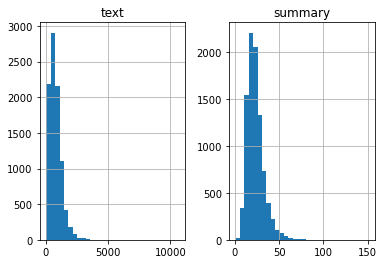

In [12]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_trg:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_src:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [13]:
train_data['Text_Cleaned'] = tokenized_corpus_trg  
print("::::: Text_Cleaned :::::")
print(train_data['Text_Cleaned'][0:5], "\n")


train_data['Summary_Cleaned'] =  tokenized_corpus_src 
print("::::: Summary :::::")
print(train_data['Summary_Cleaned'][0:5], "\n")

corpus = list(train_data['Text_Cleaned'])

::::: Text_Cleaned :::::
0    પાકિસ્તાનમાં ફસાયેલા ભારતીય નાગરિકો ખેડૂત પરિવ...
1    આજથી ચાર વર્ષે પહેલાં આજના જ દિવસે ગીર-સોમનાથ ...
2    સોમવારે હાથ ધરાયેલી મતગણતરીનાં પ્રારંભિક વલણોમ...
3    ભારત સરકારે પૂર્વ રાષ્ટ્રપતિ પ્રણવ મુખર્જીનેભા...
4    આ મેદાન કચ્છના રણના નામે ઓળખાય છે કાચબાના આકાર...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0    ગુજરાતના ગોધરાના ઇશાકભાઈ બોકડા અઢી મહિનાથી પાક...
1                      જુલાઈ એટલે ઉના દલિતકાંડનો દિવસ 
2    ગુજરાત વિધાનસભાની આઠ બેઠકો પર ત્રીજી નવેમ્બરે ...
3    પૂર્વ રાષ્ટ્રપતિ પ્રણવ મુખર્જીને ભારત સરકારે ભ...
4    ગુજરાતના અરબ સાગરથી કિમી દૂર આવેલા બંજર રણમાં ...
Name: Summary_Cleaned, dtype: object 



In [14]:
print(train_data['Text_Cleaned'][0])

પાકિસ્તાનમાં ફસાયેલા ભારતીય નાગરિકો ખેડૂત પરિવાર સાથે સંબંધ ધરાવતા ઇશાકભાઈ બોકડા પાકિસ્તાનના કરાચીમાં એક લગ્નપ્રસંગમાં સામેલ થવા માટે માર્ચે ભારતથી ગયા હતા તેમનું કહેવું છે કે માર્ચમાં જ તેમને ત્યાંથી પરત આવવાનું હતું પરંતુ લૉકડાઉનને કારણે લોકો ત્યાં ફસાઈ ગયા છે ઇશાકભાઈ અને તેમની સાથેના અન્ય ભારતીય નાગરિકો પણ ભારત પરત આવવા માગે છે અને એ માટે તેમણે ભારત સરકારની મદદ પણ માગી છે તેમણે બીબીસી સાથે વાતચીતમાં કહ્યું કે અમે ઇસ્લામાબાદમાં ભારતીય હાઈકમિશનને અરજી કરી છે પરંતુ હજી સુધી કોઈ ઠોસ માહિતી નથી મળી બીબીસીએ આ અંગે વાત કરવા માટે ભારતીય વિદેશમંત્રાલયનો સંપર્ક કર્યો હતો પરંતુ આ લખાઈ રહ્યું છે ત્યાં સુધી કોઈ જવાબ મળી શક્યો નથી ઇશાકભાઈ કહે છે કે અમૃતસરથી ગુજરાત આવવા માટે તેમણે ચાર જૂનની ટ્રેનની ટિકિટનું બુકિંગ પણ કરાવી લીધું છે અને અન્ય તમામ વ્યવસ્થા થઈ ગઈ છે પરંતુ પાકિસ્તાનથી ભારત આવવા માટે અટારી-વાઘા સરહદ પાર કરવાની પરવાનગી મળી શકી નથી ગોધરાના આ પરિવારે રમઝાન અને ઈદ પણ પાકિસ્તાનમાં ઊજવી છે ઇશાકભાઈ જણાવે છે કે રમઝાન અને ઈદ પણ અમે પરિવારથી દૂર અહીં પાકિસ્તાનમાં ઊજવી છે પણ હવે ઘરે જવું છે ઇશાકભ

In [15]:
print(train_data['Summary_Cleaned'][0])

ગુજરાતના ગોધરાના ઇશાકભાઈ બોકડા અઢી મહિનાથી પાકિસ્તાનમાં ફસાયેલા છે 


In [16]:
text_count = []
summary_count = []

for sent in train_data['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in train_data['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [17]:
graph_df['text'].describe()

count     9119.000000
mean       753.608839
std        564.893839
min         24.000000
25%        388.000000
50%        662.000000
75%       1012.000000
max      10662.000000
Name: text, dtype: float64

In [18]:
graph_df['summary'].describe()

count    9119.000000
mean       23.194649
std         9.921249
min         1.000000
25%        16.000000
50%        22.000000
75%        28.000000
max       150.000000
Name: summary, dtype: float64

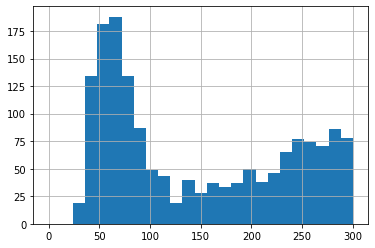

In [19]:
graph_df['text'].hist(bins = 25, range=(0, 300))
plt.show()

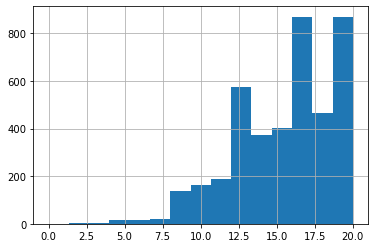

In [20]:
graph_df['summary'].hist(bins = 15, range=(0, 20))
plt.show()

In [21]:
count = 0
for i in graph_df['text']:
    if i > 10 and i <= 300:
        count = count + 1
print(count / len(graph_df['text']))

0.1769930913477355


In [22]:
count = 0
for i in graph_df['summary']:
    if i > 1 and i <= 16:
        count = count + 1
print(count / len(graph_df['summary']))

0.2520013159337647


In [23]:
max_text_len = 300
max_summary_len = 16

In [24]:
cleaned_text = np.array(train_data['Text_Cleaned'])
cleaned_summary = np.array(train_data['Summary_Cleaned'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len 
       and len(cleaned_summary[i].split()) > 1 
       and len(cleaned_text[i].split()) <= max_text_len ):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})

In [25]:
train_data['summary'] = train_data['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [26]:
train_data.shape

(9119, 7)

In [84]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

# train test split
x_tr, x_test, y_tr, y_test = train_test_split(np.array(train_data['text']),
                                         np.array(train_data['summary']),
                                         test_size = 0.2,
                                         random_state = 0,
                                         shuffle = True)
# train validation split
x_tr,x_val,y_tr,y_val = train_test_split(x_tr,
                                         y_tr,
                                         test_size = 0.2,
                                         random_state = 0,
                                         shuffle = True)
print(x_tr[0])

ટીમે એ પણ કહ્યું કે આ વાઇરસ ચીનની લૅબમાંથી લિક થઈને માણસ સુધી પહોંચ્યો હોય એ થિયરી પણ સાચી લાગતી નથી. ચીનની મુલાકાત પૂરી થતા પહેલાં મંગળવારે એક પત્રકારપરિષદમાં વિશ્વ સ્વાસ્થ્ય સંગઠનની ટીમના પીટર બેન ઍમ્બારેકે કહ્યું કે "તેમને એ વાતના પણ પુરાવા નથી મળ્યા કે ડિસેમ્બર 2019થી પહેલાં ચીનના વુહાનની એક માર્કેટમાંથી આ વાઇરસની ફેલાવવાની શરૂઆત થઈ." બેન ઍમ્બારેકે કહ્યું કે "અત્યાર સુધીમાં જે જાણકારી સામે આવી છે તેના આધારે કોરોના વાઇરસ લૅબોરેટરીમાંથી લિક થઈને માણસો સુધી પહોંચ્યો એ થિયરી સાચી લાગતી નથી. એ બિલકુલ શક્ય નથી કે વાઇરસ લૅબમાંથી ફેલાયો હોય." એ વાતની આશંકા કરાઈ રહી હતી કે વુહાનના સીફૂડ માર્કેટમાંથી કોરોના વાઇરસ ફેલાયો હતો. બેન ઍમ્બારેકનું કહેવું હતું કે તેમને વાઇરસની ઉત્પત્તિનાં નવાં પ્રમાણ ચોક્કસ મળ્યાં છે, પણ તેનાથી મહામારીનું સ્વરૂપ બદલાતું નથી. રાજીવ કપૂરનું હાર્ટઍટેકથી નિધન બોલીવૂડ કલાકાર અને કપૂર ખાનદાન સાથે સંબંધ ધરાવતા અભિનેતા રાજીવ કપૂરનું નિધન થયું છે. નીતુ કપૂરે તેમના ઇન્સ્ટાગ્રામ પર તેમની તસવીર મૂકીને આ વાતની જાણ કરી હતી. આ સાથે જ ફિલ્મ ટ્રેડ એનાલિસ્ટ કોમલ નાહટાએ ટ્વીટ કરીને મા

In [85]:
x_tr.shape

(5836,)

In [86]:
x_test.shape

(1824,)

In [87]:
x_val.shape

(1459,)

In [88]:
# Tokenize text to get the vocab count
#prepare a tokenizer for training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [89]:
counter=0
for key,value in x_tokenizer.word_counts.items():
    counter+=1
#     print(key,value)
print(counter)

202450


In [90]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 73.04519634477649
Total Coverage of rare words: 4.573076900000733


In [91]:
import seaborn as sns
from time import time

In [92]:
#prepare a tokenizer for reviews on training data

# ###############LEFT HERE  ###################

x_tokenizer = Tokenizer(tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))
print("Size of vocabulary in X = {}".format(x_tokenizer.num_words))
# convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 54570
Size of vocabulary in X = 54571


In [67]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words = tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 
y_test_seq = y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 54571


In [59]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [60]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [61]:
from tensorflow.keras.backend import clear_session
# import gensim
import re
# from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
# from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [62]:
print(f"Size of vocabulary from the w2v model = {x_voc}")

clear_session()

latent_dim = 300
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 54571
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 100)     5457100     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 300, 300),   481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

In [63]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [64]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/10
35/46 [=====================>........] - ETA: 27:32 - loss: 8.6386

In [44]:
model.save("HindiTextModel.h5")

In [45]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [46]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [47]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [48]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: कुटीर लघु और मध्यम उद्यमों को कर्ज देने के अनोखे तरीके तलाशने के लिए रिजर्व बैंक का पुणे स्थित कृषि बैंकिंग महाविद्यालय बैंकों के लिए एक प्रतियोगिता आयोजित करेगा इस प्रतियोगिता का विषय है केस स्टडी एक एमएसएमई को नए ढंग से कर्ज आबंटन कर्ज देने के नए तरीकों पर केस ने एक सर्कुलर जारी कर कहा प्रतियोगिता आयोजित करने का उद्देश्य बैंकों को ऐसे मामलों का अध्ययन करने के लिए प्रोत्साहित करना है जहां कुटीर लघु और मझोले उद्यमों को अनोखे तरीके से कर्ज दिया गया हो और ऐसे मामलों को लेकर दूसरे बैंकों को भी संवेदनशील बनाया जा सके ये कर्मचारी ले सकते हैं बैंक ने कहा कि बैंकों के कर्मचारी सदस्य जिसमें बैंकों के प्रशिक्षण प्रतिष्ठानों के फैकल्टी सदस्य क्षेत्रीय ग्रामीण बैंकों राज्य सहकारी बैंकों और शहरी सहकारी बैंकोंके सदस्य शामिल हैं इस प्रतियोगिता में हिस्सा ले सकते हैं अंग्रेजी या हिंदी भाषा का अलावा इन बैंकों के प्रशिक्षण प्रतिष्ठानों से फैकल्टी सदस्य और गैर बैंकिंग वित्तीय कंपनियों के कर्मचारी सदस्य भी इस प्रतियोगिता में हिस्सा ले सकते हैं आरबीआई ने स्टडी अंग्रेजी या हिंदी जनवरी तक मांगे हैं 

In [49]:
from tensorflow.keras.models import load_model
new_model = load_model("HindiTextModel.h5")